#**NLP Emails: Business Objective:**

Inappropriate emails would demotivates and spoil the positive environment that would lead to more attrition rate and low productivity and Inappropriate emails could be on form of bullying, racism, sexual favoritism and hate in the gender or culture, in today’s world so dominated by email no organization is immune to these hate emails.

The goal of the project is to identify such emails in the given day based on the above inappropriate content. Data Set Details: -The dataset contains around 20 lakh emails generated by employees of an organization.

# **1. Collecting and Reading the data**

In [70]:
# from google.colab import files
# uploaded = files.upload()

In [71]:
#Import Libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
import nltk
import spacy
import re
import string
import wordcloud
from wordcloud import WordCloud
nltk.download('punkt')
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from sklearn.preprocessing import LabelEncoder
from textblob import TextBlob

nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\91879\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\91879\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\91879\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [72]:
data = pd.read_csv("emails.csv")
data.head()

,Unnamed: 0,filename,Message-ID,content,Class
0,0,arnold-j/_sent_mail/34.,<15267340.1075857594923.JavaMail.evans@thyme>,eat shit\n\n\n\n\nJohn J Lavorato@excelr\n11/1...,Abusive
1,1,arnold-j/_sent_mail/517.,<15539583.1075857652152.JavaMail.evans@thyme>,fuck you,Abusive
2,2,arnold-j/_sent_mail/743.,<4339799.1075857657711.JavaMail.evans@thyme>,Gentlemen:\nThe following champagne is availab...,Abusive
3,3,arnold-j/_sent_mail/766.,<25574783.1075857658215.JavaMail.evans@thyme>,sorry i've taken so long...just been trying to...,Abusive
4,4,arnold-j/_sent_mail/797.,<19506151.1075857658895.JavaMail.evans@thyme>,asshole\n\n\n\n\nJohn J Lavorato@excelr\n12/23...,Abusive


# **2. EDA**

## 2.1 Overview of the data

In [73]:
data.shape

(48076, 5)

In [74]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48076 entries, 0 to 48075
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  48076 non-null  int64 
 1   filename    48076 non-null  object
 2   Message-ID  48076 non-null  object
 3   content     48076 non-null  object
 4   Class       48076 non-null  object
dtypes: int64(1), object(4)
memory usage: 1.8+ MB


In [75]:
data.duplicated().sum()

0

In [76]:
data.isnull().sum()

Unnamed: 0    0
filename      0
Message-ID    0
content       0
Class         0
dtype: int64

In [77]:
data.nunique()

Unnamed: 0    48076
filename      48076
Message-ID    48076
content       24656
Class             2
dtype: int64

## 2.2 Data Cleaning & Text Preprocessoing

In [78]:
data = data.rename(columns={"Unnamed: 0" : "Index_No"})
data.head(5)

,Index_No,filename,Message-ID,content,Class
0,0,arnold-j/_sent_mail/34.,<15267340.1075857594923.JavaMail.evans@thyme>,eat shit\n\n\n\n\nJohn J Lavorato@excelr\n11/1...,Abusive
1,1,arnold-j/_sent_mail/517.,<15539583.1075857652152.JavaMail.evans@thyme>,fuck you,Abusive
2,2,arnold-j/_sent_mail/743.,<4339799.1075857657711.JavaMail.evans@thyme>,Gentlemen:\nThe following champagne is availab...,Abusive
3,3,arnold-j/_sent_mail/766.,<25574783.1075857658215.JavaMail.evans@thyme>,sorry i've taken so long...just been trying to...,Abusive
4,4,arnold-j/_sent_mail/797.,<19506151.1075857658895.JavaMail.evans@thyme>,asshole\n\n\n\n\nJohn J Lavorato@excelr\n12/23...,Abusive


In [79]:
data = data.drop(["Index_No","filename","Message-ID"], axis=1)
data.head(5)

,content,Class
0,eat shit\n\n\n\n\nJohn J Lavorato@excelr\n11/1...,Abusive
1,fuck you,Abusive
2,Gentlemen:\nThe following champagne is availab...,Abusive
3,sorry i've taken so long...just been trying to...,Abusive
4,asshole\n\n\n\n\nJohn J Lavorato@excelr\n12/23...,Abusive


In [80]:
data.duplicated().sum()

23420

In [81]:
data = data.drop_duplicates()

In [82]:
data.shape

(24656, 2)

In [83]:
# Converted text in to tokens, removed stop words ans applied lemmatization
stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()

def advanced_text_cleansing(text):
    # Tokenize the text
    words = nltk.word_tokenize(text)

    # Remove stop words and lemmatize
    cleaned_tokens = [lemmatizer.lemmatize(word) for word in words if word.lower() not in stop_words]

    return ' '.join(cleaned_tokens)

# Apply the function to your DataFrame
data['tokens'] = data['content'].apply(advanced_text_cleansing)
data['tokens'] = data['tokens'].str.lower()
data.head()

,content,Class,tokens
0,eat shit\n\n\n\n\nJohn J Lavorato@excelr\n11/1...,Abusive,eat shit john j lavorato @ excelr 11/18/2000 0...
1,fuck you,Abusive,fuck
2,Gentlemen:\nThe following champagne is availab...,Abusive,gentlemen : following champagne available 70 %...
3,sorry i've taken so long...just been trying to...,Abusive,sorry 've taken long ... trying fend chick . l...
4,asshole\n\n\n\n\nJohn J Lavorato@excelr\n12/23...,Abusive,asshole john j lavorato @ excelr 12/23/2000 10...


In [84]:
# Remove punctuations or special characters
def Remove_punctuations (text):
    text = re.sub(r'<.*?>!@#$%^&*()', '', text)
    text = re.sub(r'\d+', '', text)
    text=text.translate(str.maketrans('', '', string.punctuation))
    return text

In [85]:
data['Remove_punctuations_tokens'] = data['tokens'].apply(Remove_punctuations)
data.head()

,content,Class,tokens,Remove_punctuations_tokens
0,eat shit\n\n\n\n\nJohn J Lavorato@excelr\n11/1...,Abusive,eat shit john j lavorato @ excelr 11/18/2000 0...,eat shit john j lavorato excelr pm john ar...
1,fuck you,Abusive,fuck,fuck
2,Gentlemen:\nThe following champagne is availab...,Abusive,gentlemen : following champagne available 70 %...,gentlemen following champagne available app...
3,sorry i've taken so long...just been trying to...,Abusive,sorry 've taken long ... trying fend chick . l...,sorry ve taken long trying fend chick life s...
4,asshole\n\n\n\n\nJohn J Lavorato@excelr\n12/23...,Abusive,asshole john j lavorato @ excelr 12/23/2000 10...,asshole john j lavorato excelr john arnold...


In [86]:
#Removes all URLs from text
def remove_urls(text):
  pattern = re.compile(r'(https?://[^\s]+)')
  return pattern.sub('', text)

In [87]:
data['remove_urls_tokens'] = data['Remove_punctuations_tokens'].apply(remove_urls)
data.head()

,content,Class,tokens,Remove_punctuations_tokens,remove_urls_tokens
0,eat shit\n\n\n\n\nJohn J Lavorato@excelr\n11/1...,Abusive,eat shit john j lavorato @ excelr 11/18/2000 0...,eat shit john j lavorato excelr pm john ar...,eat shit john j lavorato excelr pm john ar...
1,fuck you,Abusive,fuck,fuck,fuck
2,Gentlemen:\nThe following champagne is availab...,Abusive,gentlemen : following champagne available 70 %...,gentlemen following champagne available app...,gentlemen following champagne available app...
3,sorry i've taken so long...just been trying to...,Abusive,sorry 've taken long ... trying fend chick . l...,sorry ve taken long trying fend chick life s...,sorry ve taken long trying fend chick life s...
4,asshole\n\n\n\n\nJohn J Lavorato@excelr\n12/23...,Abusive,asshole john j lavorato @ excelr 12/23/2000 10...,asshole john j lavorato excelr john arnold...,asshole john j lavorato excelr john arnold...


In [88]:
# Removes unwanted spaces from mail content
def remove_unwanted_spaces(text): 
     text = text.strip()
     pattern = re.compile(r'\s+')
     text = pattern.sub(' ', text)
     return text

In [89]:
data['final_tokens'] = data['remove_urls_tokens'].apply(remove_unwanted_spaces)
data.head()

,content,Class,tokens,Remove_punctuations_tokens,remove_urls_tokens,final_tokens
0,eat shit\n\n\n\n\nJohn J Lavorato@excelr\n11/1...,Abusive,eat shit john j lavorato @ excelr 11/18/2000 0...,eat shit john j lavorato excelr pm john ar...,eat shit john j lavorato excelr pm john ar...,eat shit john j lavorato excelr pm john arnold...
1,fuck you,Abusive,fuck,fuck,fuck,fuck
2,Gentlemen:\nThe following champagne is availab...,Abusive,gentlemen : following champagne available 70 %...,gentlemen following champagne available app...,gentlemen following champagne available app...,gentlemen following champagne available approx...
3,sorry i've taken so long...just been trying to...,Abusive,sorry 've taken long ... trying fend chick . l...,sorry ve taken long trying fend chick life s...,sorry ve taken long trying fend chick life s...,sorry ve taken long trying fend chick life soo...
4,asshole\n\n\n\n\nJohn J Lavorato@excelr\n12/23...,Abusive,asshole john j lavorato @ excelr 12/23/2000 10...,asshole john j lavorato excelr john arnold...,asshole john j lavorato excelr john arnold...,asshole john j lavorato excelr john arnoldhoue...


In [90]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 24656 entries, 0 to 47981
Data columns (total 6 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   content                     24656 non-null  object
 1   Class                       24656 non-null  object
 2   tokens                      24656 non-null  object
 3   Remove_punctuations_tokens  24656 non-null  object
 4   remove_urls_tokens          24656 non-null  object
 5   final_tokens                24656 non-null  object
dtypes: object(6)
memory usage: 1.3+ MB


In [91]:
data = data[["final_tokens", "Class"]].drop_duplicates()

data = data.dropna(subset=["final_tokens"])
data.head()

,final_tokens,Class
0,eat shit john j lavorato excelr pm john arnold...,Abusive
1,fuck,Abusive
2,gentlemen following champagne available approx...,Abusive
3,sorry ve taken long trying fend chick life soo...,Abusive
4,asshole john j lavorato excelr john arnoldhoue...,Abusive


In [92]:
data.shape

(22811, 2)

## 2.3 Statistics

In [93]:
# Calculate the average length of a sentence
avg_sentence_length = data['final_tokens'].apply(len).mean()
avg_sentence_length

1160.579062732892

In [94]:
# Calculate the number of unique words
num_unique_words = len(set(data['final_tokens'].sum()))
num_unique_words

27

In [95]:
# Calculate the most frequent words
most_frequent_words = data['final_tokens'].value_counts().nlargest(10).index.tolist()

most_frequent_words_10 = data['final_tokens'].str.split().explode().value_counts().nlargest(10).index.tolist()
most_frequent_words_10

['s',
 'excelr',
 'http',
 'td',
 'font',
 'ect',
 'subject',
 'pm',
 'please',
 'email']

## 2.4 Visualizations

In [96]:
class_counts = data['Class'].value_counts()

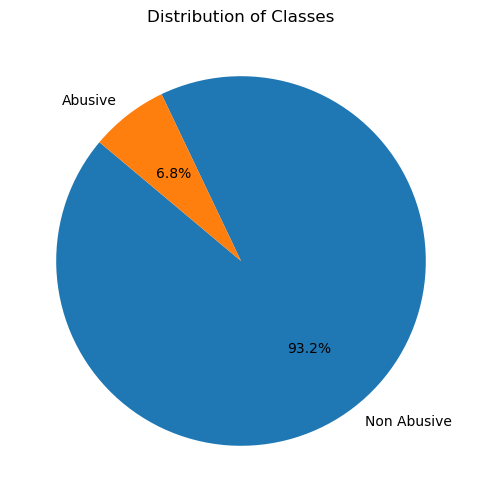

In [97]:
# Plot the pie chart
plt.figure(figsize=(6, 6))
plt.pie(class_counts, labels=class_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Distribution of Classes')
plt.show()

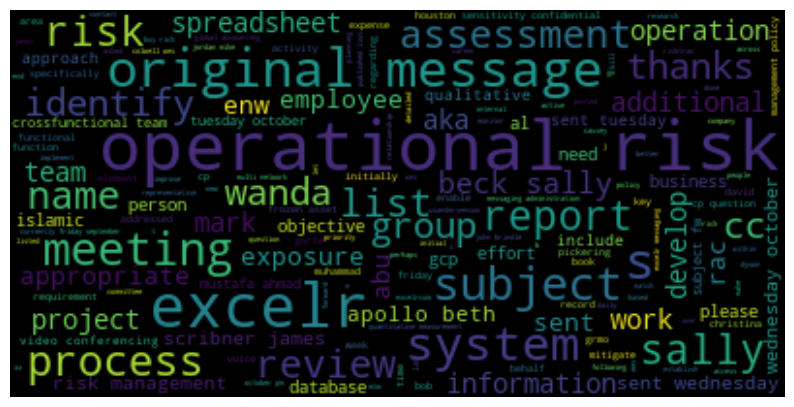

In [98]:
# Create a word cloud of the most frequent words
plt.figure(figsize=(10, 10))
wordcloud = WordCloud().generate(' '.join(most_frequent_words))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

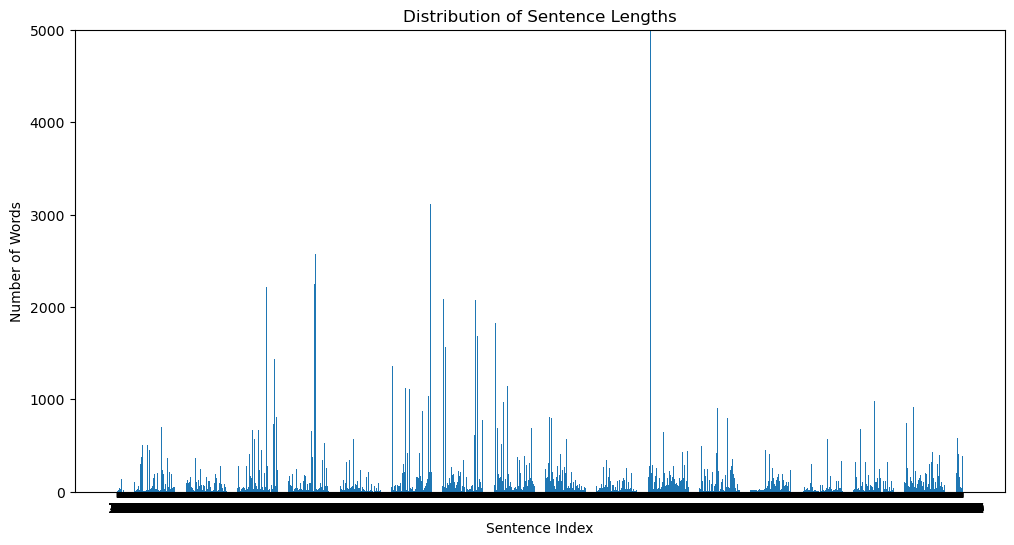

In [99]:
# Create a bar chart of the distribution of words in sentence

sentence_lengths = [len(sentence.split()) for sentence in data['final_tokens']]

plt.figure(figsize=(12, 6))
plt.bar(range(len(sentence_lengths)), sentence_lengths, tick_label=range(1, len(sentence_lengths) + 1))
plt.xlabel('Sentence Index')
plt.ylabel('Number of Words')  # Updated y-axis label
plt.title('Distribution of Sentence Lengths')

# Set the y-axis limit to 1000 (you can adjust this as needed)
plt.ylim(0, 5000)

plt.show()

## 2.5 Sentiment Analysis

In [100]:
def calculate_sentiment(text):
    # Ensure text is a string
    text = str(text)
    # Create a TextBlob object
    text_blob = TextBlob(text)
    # Return the sentiment polarity
    return text_blob.sentiment.polarity

# Apply the function to the 'final_tokens' column and assign to 'sentiment_score'
data["Sentiment_score"] = data["final_tokens"].apply(calculate_sentiment)

data.head()

,final_tokens,Class,Sentiment_score
0,eat shit john j lavorato excelr pm john arnold...,Abusive,-0.183333
1,fuck,Abusive,-0.400000
2,gentlemen following champagne available approx...,Abusive,0.000000
3,sorry ve taken long trying fend chick life soo...,Abusive,-0.179583
4,asshole john j lavorato excelr john arnoldhoue...,Abusive,-0.166667


In [101]:
data.shape

(22811, 3)

## 2.6 Topic modelling

In [102]:
import gensim
from gensim.utils import simple_preprocess
from gensim.corpora import Dictionary

text_data = data["final_tokens"]

# Tokenize your documents
documents = [simple_preprocess(str(document)) for document in text_data]

# Create a Gensim dictionary
dictionary = Dictionary(documents)

# Convert the documents to a Gensim corpus
corpus = [dictionary.doc2bow(document) for document in documents]


In [103]:
from gensim.models import LdaModel

# Set the number of topics
num_topics = 2  # You can adjust this based on your needs

# Train the LDA model
lda_model = LdaModel(corpus, num_topics=num_topics, id2word=dictionary, passes=15)

# Get the topics for each document
document_topics = [lda_model[document] for document in corpus]

# Assuming your DataFrame is named 'data', add a new column 'topics' to store the topics
data['topics'] = document_topics

In [104]:
data.head()

,final_tokens,Class,Sentiment_score,topics
0,eat shit john j lavorato excelr pm john arnold...,Abusive,-0.183333,"[(0, 0.4953715), (1, 0.50462854)]"
1,fuck,Abusive,-0.400000,"[(0, 0.74914587), (1, 0.25085413)]"
2,gentlemen following champagne available approx...,Abusive,0.000000,"[(0, 0.6879511), (1, 0.31204894)]"
3,sorry ve taken long trying fend chick life soo...,Abusive,-0.179583,"[(0, 0.5757439), (1, 0.4242561)]"
4,asshole john j lavorato excelr john arnoldhoue...,Abusive,-0.166667,"[(0, 0.21802726), (1, 0.78197277)]"


In [105]:
data.shape

(22811, 4)

## 2.7 part-of-speech tags

In [106]:
import nltk
from nltk.tokenize import word_tokenize

nltk.download('punkt')

def get_pos_tags(text):
    words = word_tokenize(text)
    pos_tags = nltk.pos_tag(words)
    return pos_tags

data['pos_tags'] = data['final_tokens'].apply(lambda x: get_pos_tags(str(x)))

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\91879\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [107]:
data.head()

,final_tokens,Class,Sentiment_score,topics,pos_tags
0,eat shit john j lavorato excelr pm john arnold...,Abusive,-0.183333,"[(0, 0.4953715), (1, 0.50462854)]","[(eat, NN), (shit, VBD), (john, JJ), (j, NN), ..."
1,fuck,Abusive,-0.400000,"[(0, 0.74914587), (1, 0.25085413)]","[(fuck, NN)]"
2,gentlemen following champagne available approx...,Abusive,0.000000,"[(0, 0.6879511), (1, 0.31204894)]","[(gentlemen, NNS), (following, VBG), (champagn..."
3,sorry ve taken long trying fend chick life soo...,Abusive,-0.179583,"[(0, 0.5757439), (1, 0.4242561)]","[(sorry, NN), (ve, NNS), (taken, VBN), (long, ..."
4,asshole john j lavorato excelr john arnoldhoue...,Abusive,-0.166667,"[(0, 0.21802726), (1, 0.78197277)]","[(asshole, JJ), (john, NN), (j, NN), (lavorato..."


In [108]:
data.shape

(22811, 5)

# **3. Vectorization**

In [113]:
label_encoder = LabelEncoder()
data['class_label'] = label_encoder.fit_transform(data['Class'])

In [110]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Vectorize the text
vectorizer = TfidfVectorizer()
data['final_tokens'].fillna('', inplace=True)
X = vectorizer.fit_transform(data['final_tokens'])

In [111]:
print(X)

  (0, 50443)	0.19248477955921567
  (0, 22407)	0.31332307361958417
  (0, 24330)	0.20398637931484384
  (0, 17316)	0.33681894800644285
  (0, 24868)	0.21381295963446503
  (0, 16772)	0.35056315344440986
  (0, 48091)	0.2780205143522981
  (0, 76534)	0.19329382468092873
  (0, 12467)	0.27608299379475837
  (0, 64670)	0.2822632171536512
  (0, 9056)	0.18942889343542824
  (0, 36463)	0.172084033115298
  (0, 97091)	0.06234427775383355
  (0, 14845)	0.07629893018284807
  (0, 28989)	0.10511194132301602
  (0, 5266)	0.1697161712882785
  (0, 77560)	0.0698000957868198
  (0, 33108)	0.07577865015255399
  (0, 56696)	0.18293356880220044
  (0, 52269)	0.19571572159485848
  (0, 91753)	0.18492079748014148
  (0, 28626)	0.19728636117000406
  (1, 37792)	1.0
  (2, 21162)	0.13743146562020095
  (2, 86758)	0.1500417428977012
  :	:
  (22810, 21943)	0.011582159860579993
  (22810, 58161)	0.012534852504417836
  (22810, 68556)	0.008512708521900026
  (22810, 79675)	0.012709140996166558
  (22810, 39426)	0.023770174354210014
  (2

In [112]:
X.shape

(22811, 117893)

# **4. Model Building**

## 4.1  Logistoic regression

In [114]:
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression

# Create a LogisticRegression model
logreg = LogisticRegression()

# Perform 5-fold cross-validation
scores = cross_val_score(logreg, X, data['class_label'], cv=5)

# Print the accuracy scores for each fold
print("Accuracy scores for each fold: ", scores)

# Calculate and print the average accuracy score
Avg_accuracy = scores.mean()
print("Average Logreg accuracy score: {:.3f}%".format(Avg_accuracy * 100))


Accuracy scores for each fold:  [0.95069034 0.95155633 0.95725559 0.95879    0.95352915]
Average Logreg accuracy score: 95.436%


In [115]:
# from sklearn.model_selection import train_test_split
# from sklearn.linear_model import LogisticRegression
# from sklearn.metrics import accuracy_score

# Accuracy_scores = []

# for i in range (1,6):
#     # Split the data
#     X_train, X_test, Y_train, Y_test = train_test_split(X, data['class_label'], test_size=0.25, random_state=i)
    
#     # Train the model
#     logreg = LogisticRegression()
#     logreg.fit(X_train, Y_train)
    
#     #Predict the model
#     Y_pred = logreg.predict(X_test)
    
#     #accuracy score
#     accuracy = accuracy_score(Y_pred, Y_test)
#     Accuracy_scores.append(accuracy)


# # Average accuracy score
# Avg_accuracy = np.mean(Accuracy_scores)
# print("Logreg_accuracy_score: ", round(Avg_accuracy*100, 3), "%")

## 4.2  Support vector machine(SVM)

In [116]:
from sklearn.model_selection import cross_val_score
from sklearn.svm import SVC

# Create an SVC model
svc = SVC()

# Perform 5-fold cross-validation
scores = cross_val_score(svc, X, data['class_label'], cv=5)

# Print the accuracy scores for each fold
print("Accuracy scores for each fold:", scores)

# Calculate and print the average accuracy score
Avg_accuracy = scores.mean()
print("Average SVC accuracy score: {:.3f}%".format(Avg_accuracy * 100))

Accuracy scores for each fold: [0.95901819 0.94322665 0.96668128 0.96010522 0.96076282]
Average SVC accuracy score: 95.796%


In [117]:
# from sklearn.svm import SVC

# Accuracy_scores = []

# for i in range (1,6):
#     # Split the data
#     X_train, X_test, Y_train, Y_test = train_test_split(X, data['class_label'], test_size=0.25, random_state=i)
    
#     # Train the model
#     svc = SVC()
#     svc.fit(X_train, Y_train)
    
#     #Predict the model
#     Y_pred = svc.predict(X_test)
    
#     #accuracy score
#     accuracy = accuracy_score(Y_pred, Y_test)
#     Accuracy_scores.append(accuracy)


# # Average accuracy score
# Avg_accuracy = np.mean(Accuracy_scores)
# print("SVC_accuracy_score: ", round(Avg_accuracy*100, 3), "%")

## 4.3  K-Nearest Neighbors

In [118]:
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsClassifier

# Create a KNeighborsClassifier model
knn = KNeighborsClassifier(n_neighbors=5)

# Perform 5-fold cross-validation
scores = cross_val_score(knn, X, data['class_label'], cv=5)

# Print the accuracy scores for each fold
print("Accuracy scores for each fold:", scores)

# Calculate and print the average accuracy score
Avg_accuracy = scores.mean()
print("Average KNN accuracy score: {:.3f}%".format(Avg_accuracy * 100))


Accuracy scores for each fold: [nan nan nan nan nan]
Average KNN accuracy score: nan%


In [119]:
# from sklearn.neighbors import KNeighborsClassifier

# Accuracy_scores = []

# for i in range (1,6):
#     # Split the data
#     X_train, X_test, Y_train, Y_test = train_test_split(X, data['class_label'], test_size=0.25, random_state=i)
    
#     # Train the model
#     knn = KNeighborsClassifier(n_neighbors=5)
#     knn.fit(X_train, Y_train)
    
#     #Predict the model
#     Y_pred = knn.predict(X_test)
    
#     #accuracy score
#     accuracy = accuracy_score(Y_pred, Y_test)
#     Accuracy_scores.append(accuracy)


# # Average accuracy score
# Avg_accuracy = np.mean(Accuracy_scores)
# print("knn_accuracy_score: ", round(Avg_accuracy*100, 3), "%")

## 4.4  Naive Bayes classifier

In [120]:
from sklearn.model_selection import cross_val_score
from sklearn.naive_bayes import MultinomialNB

# Create a MultinomialNB model
NB = MultinomialNB()

# Perform 5-fold cross-validation
scores = cross_val_score(NB, X, data['class_label'], cv=5)

# Print the accuracy scores for each fold
print("Accuracy scores for each fold:", scores)

# Calculate and print the average accuracy score
Avg_accuracy = scores.mean()
print("Average MultinomialNB accuracy score: {:.3f}%".format(Avg_accuracy * 100))


Accuracy scores for each fold: [0.93228139 0.93248575 0.93358176 0.93204735 0.93160894]
Average MultinomialNB accuracy score: 93.240%


In [121]:
# from sklearn.naive_bayes import MultinomialNB

# Accuracy_scores = []

# for i in range (1,6):
#     # Split the data
#     X_train, X_test, Y_train, Y_test = train_test_split(X, data['class_label'], test_size=0.25, random_state=i)
    
#     # Train the model
#     NB = MultinomialNB()
#     NB.fit(X_train, Y_train)
    
#     #Predict the model
#     Y_pred = NB.predict(X_test)
    
#     #accuracy score
#     accuracy = accuracy_score(Y_pred, Y_test)
#     Accuracy_scores.append(accuracy)


# # Average accuracy score
# Avg_accuracy = np.mean(Accuracy_scores)
# print("NB_accuracy_score: ", round(Avg_accuracy*100, 3), "%")

## 4.5  Decision Tree classifier

In [122]:
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier

# Create a DecisionTreeClassifier model
DT = DecisionTreeClassifier()

# Perform 5-fold cross-validation
scores = cross_val_score(DT, X, data['class_label'], cv=5)

# Print the accuracy scores for each fold
print("Accuracy scores for each fold:", scores)

# Calculate and print the average accuracy score
Avg_accuracy = scores.mean()
print("Average DecisionTreeClassifier accuracy score: {:.3f}%".format(Avg_accuracy * 100))


Accuracy scores for each fold: [0.94564979 0.93073214 0.96339325 0.96536607 0.94870671]
Average DecisionTreeClassifier accuracy score: 95.077%


In [123]:
# from sklearn.tree import DecisionTreeClassifier

# Accuracy_scores = []

# for i in range (1,6):
#     # Split the data
#     X_train, X_test, Y_train, Y_test = train_test_split(X, data['class_label'], test_size=0.25, random_state=i)
    
#     # Train the model
#     DT = DecisionTreeClassifier()
#     DT.fit(X_train, Y_train)
    
#     #Predict the model
#     Y_pred = DT.predict(X_test)
    
#     #accuracy score
#     accuracy = accuracy_score(Y_pred, Y_test)
#     Accuracy_scores.append(accuracy)


# # Average accuracy score
# Avg_accuracy = np.mean(Accuracy_scores)
# print("DT_accuracy_score: ", round(Avg_accuracy*100, 3), "%")

## 4.6  Random Forest classifier

In [124]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier

# Create a RandomForestClassifier model
RFC = RandomForestClassifier()

# Perform 5-fold cross-validation
scores = cross_val_score(RFC, X, data['class_label'], cv=5)

# Print the accuracy scores for each fold
print("Accuracy scores for each fold:", scores)

# Calculate and print the average accuracy score
Avg_accuracy = scores.mean()
print("Average RandomForestClassifier accuracy score: {:.3f}%".format(Avg_accuracy * 100))


Accuracy scores for each fold: [0.95069034 0.93423937 0.9585708  0.96054362 0.95111793]
Average RandomForestClassifier accuracy score: 95.103%


In [125]:
# from sklearn.ensemble import RandomForestClassifier

# Accuracy_scores = []

# for i in range (1,6):
#     # Split the data
#     X_train, X_test, Y_train, Y_test = train_test_split(X, data['class_label'], test_size=0.25, random_state=i)
    
#     # Train the model
#     RFC = RandomForestClassifier()
#     RFC.fit(X_train, Y_train)
    
#     #Predict the model
#     Y_pred = RFC.predict(X_test)
    
#     #accuracy score
#     accuracy = accuracy_score(Y_pred, Y_test)
#     Accuracy_scores.append(accuracy)


# # Average accuracy score
# Avg_accuracy = np.mean(Accuracy_scores)
# print("DT_accuracy_score: ", round(Avg_accuracy*100, 3), "%")

## 4.7  AdaBoost Classifier

In [126]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import AdaBoostClassifier

# Create an AdaBoostClassifier model
ABC = AdaBoostClassifier()

# Perform 5-fold cross-validation
scores = cross_val_score(ABC, X, data['class_label'], cv=5)

# Print the accuracy scores for each fold
print("Accuracy scores for each fold:", scores)

# Calculate and print the average accuracy score
Avg_accuracy = scores.mean()
print("Average AdaBoostClassifier accuracy score: {:.3f}%".format(Avg_accuracy * 100))


Accuracy scores for each fold: [0.95244357 0.93270495 0.96207804 0.96317405 0.95418676]
Average AdaBoostClassifier accuracy score: 95.292%


In [127]:
# from sklearn.ensemble import AdaBoostClassifier

# Accuracy_scores = []

# for i in range (1,6):
#     # Split the data
#     X_train, X_test, Y_train, Y_test = train_test_split(X, data['class_label'], test_size=0.25, random_state=i)
    
#     # Train the model
#     ABC = AdaBoostClassifier()
#     ABC.fit(X_train, Y_train)
    
#     #Predict the model
#     Y_pred = ABC.predict(X_test)
    
#     #accuracy score
#     accuracy = accuracy_score(Y_pred, Y_test)
#     Accuracy_scores.append(accuracy)


# # Average accuracy score
# Avg_accuracy = np.mean(Accuracy_scores)
# print("ABC_accuracy_score: ", round(Avg_accuracy*100, 3), "%")

## 4.8   Gradient Boosting Classifier

In [128]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import GradientBoostingClassifier

# Create a GradientBoostingClassifier model
GBC = GradientBoostingClassifier()

# Perform 5-fold cross-validation
scores = cross_val_score(GBC, X, data['class_label'], cv=5)

# Print the accuracy scores for each fold
print("Accuracy scores for each fold:", scores)

# Calculate and print the average accuracy score
Avg_accuracy = scores.mean()
print("Average GradientBoostingClassifier accuracy score: {:.3f}%".format(Avg_accuracy * 100))


Accuracy scores for each fold: [0.95814157 0.95352915 0.95966681 0.96602367 0.95922841]
Average GradientBoostingClassifier accuracy score: 95.932%


In [129]:
# from sklearn.ensemble import GradiantBoostingClassifier

# Accuracy_scores = []

# for i in range (1,6):
#     # Split the data
#     X_train, X_test, Y_train, Y_test = train_test_split(X, data['class_label'], test_size=0.25, random_state=i)
    
#     # Train the model
#     GBC = GradiantBoostingClassifier()
#     GBC.fit(X_train, Y_train)
    
#     #Predict the model
#     Y_pred = GBC.predict(X_test)
    
#     #accuracy score
#     accuracy = accuracy_score(Y_pred, Y_test)
#     Accuracy_scores.append(accuracy)


# # Average accuracy score
# Avg_accuracy = np.mean(Accuracy_scores)
# print("GBC_accuracy_score: ", round(Avg_accuracy*100, 3), "%")

## 4.9  XG Boost Classifier

In [130]:
from sklearn.model_selection import cross_val_score
from xgboost import XGBClassifier

# Create an XGBClassifier model
XGBC = XGBClassifier()

# Perform 5-fold cross-validation
scores = cross_val_score(XGBC, X, data['class_label'], cv=5)

# Print the accuracy scores for each fold
print("Accuracy scores for each fold:", scores)

# Calculate and print the average accuracy score
Avg_accuracy = scores.mean()
print("Average XGBC accuracy score: {:.3f}%".format(Avg_accuracy * 100))


Accuracy scores for each fold: [0.96186719 0.94870671 0.97325734 0.97281894 0.96339325]
Average XGBC accuracy score: 96.401%


In [131]:
# from xgboost import XGBClassifier

# Accuracy_scores = []

# for i in range (1,6):
#     # Split the data
#     X_train, X_test, Y_train, Y_test = train_test_split(X, data['class_label'], test_size=0.25, random_state=i)
    
#     # Train the model
#     XGBC = XGBClassifier()
#     XGBC.fit(X_train, Y_train)
    
#     #Predict the model
#     Y_pred = XGBC.predict(X_test)
    
#     #accuracy score
#     accuracy = accuracy_score(Y_pred, Y_test)
#     Accuracy_scores.append(accuracy)


# # Average accuracy score
# Avg_accuracy = np.mean(Accuracy_scores)
# print("XGBC_accuracy_score: ", round(Avg_accuracy*100, 3), "%")

# 5. Model Evaluation

## Model Name	Accuracy Score

    ## XG Boost Classifier		96.40%
    ## Gradient Boosting Classifier	95.93%
    ##Support vector Classifier		95.80%
    ## Logistic regression		95.44%
    ## AdaBoost Classifier		95.29%
    ## Random Forest Classifier		95.10%
    ## Decision Tree Classifier		95.08%
    ## Multinomial NB			93.24%
    ## K-Nearest neighbors		60.97%

### XG Boost Classifier preforming very good compare to other classification models with 97% accuracy.

In [133]:
import joblib

# Fit the SVC model to the entire dataset
XGBC.fit(X, data['class_label'])

# Save the TF-IDF vectorizer
joblib.dump(vectorizer, "TfidfVectorizer.pkl")

# Save the model to a file
joblib.dump(XGBC, "XGBoost_Model.pkl")


['XGBoost_Model.pkl']